# Earthquake location
Earth Physics  
Marco Scuderi  
**Reminder**: all the scripts are available on [GitHub]('https://github.com/marcoscuderi/Earth-physics')

The aim of this program is to analyze real seismograms from stations close by an earthquake to individuate the Hypocenter of the earthquake.

## Theoretical background 

**Problem set**: We need to find the **epicenter** of an earthquake (i.e. location)

**What do we know**: we can record the waveform that propagates through the Erath at different stations that may or may not be close to the epicenter of the earthquae. From the **seismograms** we can individuate the time arrival of the **P and S waves** ($t_p$ and $t_s$). 

**What I do not know**: I need to calculate the **oring time** ($t_0$) of the earthquake. This is fundamental to calculate the **traveltime** of the waveform:  
$T_p$ = $t_p-t_0$


<div style="display: flex; flex-direction: row; align-items: center; justify-content: space-between;">
    <div style="flex: 1;">

**What tools we can use?**: we need to be clever in using the arrival time of the P and S waves to build the **Wadati diagram** to retrive the origin time. 

$t_s - t_p = t_p(\frac{v_p}{v_s}-1)-t_0(\frac{v_p}{v_s}-1)$  

</div>
    <div style="flex: 1; text-align: right;">
        <img src="Figure_2.png" alt="Your Figure" width="800"/>
    </div>
</div>


#### Now we know the origin time   $t_0$  
This information allows us to calculate the **traveltime**: $T_p = t_p - t_0$  


To find the location I can follow two paths:  
 
- **first solution**  
If I know the velocity of the medium I can calculate the **Distance** as follows: $D = V_p * T_p$ 

We can assume as constant velcoty v=5.5 [km/s] that is characteristic of the carbonates in the upper part of the crust in the appennines (8-10km depth) where seismogenic faults are present.  

- **second solution**  
If we do not know the origin time we can assume a $\frac{v_p}{v_s} = \sqrt{3}$.  In other words we assume a Poissonian medium. 

### Import the necessary packages   
**note** you have to install pyproj  
``` conda install pyproj```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import os

%matplotlib qt

### Step one - import the data
In the excercise folder we have the data collected from the three components seismometers (i.e. x,y,z) at each station (GUMA, NRCA, PTQR and TERO).  
**know your data** For each station we have a separate file for each component (E, N, Z) 

In [2]:
path = os.getcwd()     # get the path for the Current Working Directory  
staz=['NRCA','TERO','PTQR','GUMA'] # create a list of names for the stations
comp=['.E.asc','.N.asc','.Z.asc'] # create a list of names for the three components East - North - Z

In [3]:
File_e=[];File_n=[];File_z=[] 

# per ogni stazione crea una lista con il path per le varie componenti
for i in range(len(staz)):
    File_e.append(os.path.join('%s/data'%path,staz[i]+comp[0]))
    File_n.append(os.path.join('%s/data'%path,staz[i]+comp[1]))
    File_z.append(os.path.join('%s/data'%path,staz[i]+comp[2])) 

In [4]:

# crea un dizionaio di array dove mettere tutte le stazioni e componenti 
data = {}
kk=0
for i in zip(File_e,File_n,File_z):
    data['%s_E'%staz[kk]] = np.loadtxt(i[0])
    data['%s_N'%staz[kk]] = np.loadtxt(i[1])
    data['%s_Z'%staz[kk]] = np.loadtxt(i[2])
    kk+=1


Now we can plot the waveforms from all the stations

In [5]:
# for each station plot the three components
for i in staz:
    fig, axes = plt.subplots(nrows=3,figsize=(12,12),sharex=True)   #per condividere l'asse x nei 3 subplots
    axes[0].plot(data['%s_E'%i][:,0],data['%s_E'%i][:,1],'r',label='Est component')
    axes[0].set_ylabel('Counts')
    axes[0].legend(loc='upper right')
    
    axes[1].plot(data['%s_N'%i][:,0],data['%s_N'%i][:,1],'r',label='North component')
    axes[1].set_ylabel('Counts')
    axes[1].legend(loc='upper right')
    
    axes[2].plot(data['%s_Z'%i][:,0],data['%s_Z'%i][:,1],'r',label='Vertical component')
    axes[2].set_ylabel('Counts')
    axes[2].set_xlabel('Time [s]')
    axes[2].legend(loc='upper right')
    
    axes[0].set_xlim([0,150]) # applicato a tutti
    axes[0].title.set_text(i)

libGL error: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: iris
libGL error: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)
libGL error: failed to load driver: swrast


Now we can create variables to store the values of $t_p$ and $t_s$.  
I can also calculate the $t_p-t_s$ difference for every station.
- tp, ts 
- ts-tp

In [6]:
#stazione NRCA, prende i tempi di arrivo S e P ed S-P
tp_1 = 98.76
ts_1 = 105.17
y1 = ts_1 - tp_1
print(y1)
#stazione TERO
tp_2 = 96.42
ts_2 = 100.72
y2 = ts_2 - tp_2
print(y2)
#stazione PTQR
tp_3 = 98.63
ts_3 = 104.91
y3 = ts_3 - tp_3
print(y3)
#stazione GUMA
tp_4 = 102.84
ts_4 = 113.22
y4 = ts_4 - tp_4
print(y4)

6.409999999999997
4.299999999999997
6.280000000000001
10.379999999999995


To facilitate data manipulation I can create a pandas dataframe 

In [7]:
data = {'Stazioni':['NRCA','TERO','PTQR','GUMA'],
        'tp':[tp_1,tp_2, tp_3,tp_4],
        'ts':[ts_1,ts_2, ts_3,ts_4],
        'ts_tp':[y1,y2,y3,y4]
       }

df = pd.DataFrame(data)
df

,Stazioni,tp,ts,ts_tp
0,NRCA,98.76,105.17,6.41
1,TERO,96.42,100.72,4.30
2,PTQR,98.63,104.91,6.28
3,GUMA,102.84,113.22,10.38


Now we are ready to visualize the data

Text(0.5, 1.0, '"Nostro" diagramma di Wadati ')

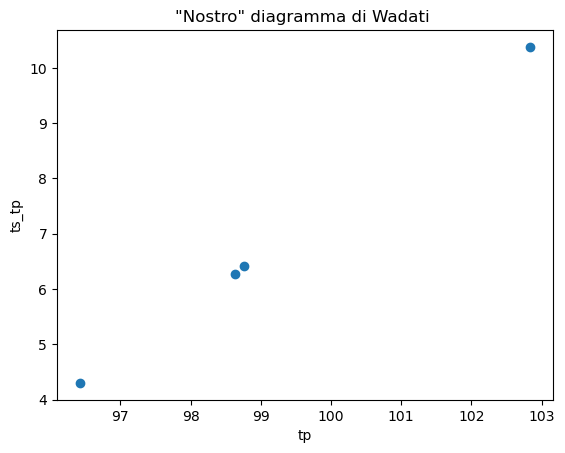

In [8]:
%matplotlib inline
fig=plt.figure()
plt.scatter(df.tp,df.ts_tp)
plt.xlabel('tp')
plt.ylabel('ts_tp')
plt.title('"Nostro" diagramma di Wadati ')

To calculate the origin time we need to perform a linear fit to the data and calculate the intercept for y=0

In [9]:
fit = linregress(df.tp,df.ts_tp)
t_0 = - fit[1]/fit[0]      # per y = 0 otteniamo il nostro x che definisce t_0

print(fit)
print(t_0)
#fit[0] è il coefficiente angolare
#fit[1] è l'intercetta

LinregressResult(slope=0.951826065713936, intercept=-87.54295224135818, rvalue=0.9997041519533606, pvalue=0.00029584804663940206, stderr=0.016375264640660223, intercept_stderr=1.6242557330717662)
91.97368657444241


Now we can plot all together

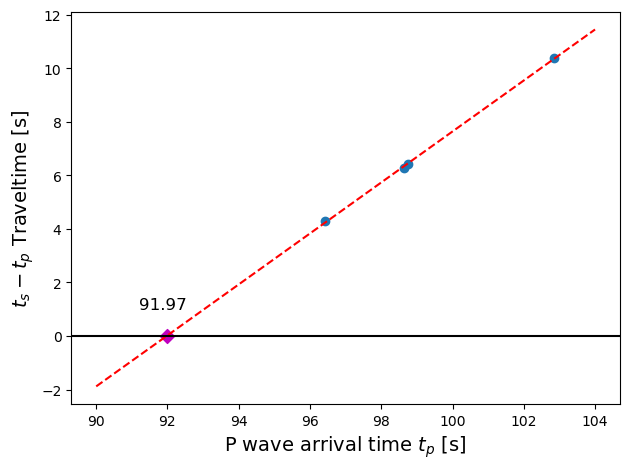

In [10]:
x = np.linspace(90,104)
y = fit[0]*x + fit[1]      # la regressione lineare è una retta con m = fit[0] e q = fit[1]

fig=plt.figure()
plt.plot(x,y, c = 'r', linestyle='dashed', label = fit)
plt.scatter(df.tp,df.ts_tp)
plt.scatter(t_0,0, color='m',s=50, marker='D')
plt.xlabel('P wave arrival time $t_p$ [s]', fontsize=14)
plt.ylabel('$t_s-t_p$ Traveltime [s]', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-')
plt.text(91.2, 1, '%.2f'%t_0, fontsize=12)
plt.tight_layout()

Ora stimiamo le distanze dalle varie stazioni e quindi stimiamo la nostra localizzazione partendo dai dati ottenuti dal diagramma di Wadati: 

**Metodo 1: D = Vp * T<sub>p</sub>**. 

In [11]:
v = 5.500 #velocità carbonati km/s

dNRCA = v*(df.tp[0] - t_0)  #distanze stazione-terremoto in km
dTERO = v*(df.tp[1] - t_0)
dPTQR = v*(df.tp[2] - t_0)
dGUMA = v*(df.tp[3] - t_0)
Dsp = (dNRCA,dTERO,dPTQR,dGUMA)
print(dGUMA)

59.76472384056676


Conoscendo le coordinate delle stazioni in lat e long

In [12]:
lat_NRCA,lon_NRCA = (42.83355,13.11427)
lat_TERO,lon_TERO = (42.62279,13.60393)
lat_PTQR,lon_PTQR = (42.02193,13.40057)
lat_GUMA,lon_GUMA = (43.0627,13.03352)

#creiamo un array con le coordinate lat e lon delle 4 stazioni
lat_sta=np.array([lat_NRCA,lat_TERO,lat_PTQR,lat_GUMA])
lon_sta=np.array([lon_NRCA,lon_TERO,lon_PTQR,lon_GUMA])

Si può pasare da lat e long a coordinate UTM 

In [13]:
#https://it.wikipedia.org/wiki/Proiezione_universale_trasversa_di_Mercatore
import pyproj
utm33 = pyproj.Proj(proj='utm',zone=33, ellps='WGS84', preserve_units=False)

utmx_sta,utmy_sta=utm33(lon_sta,lat_sta)
print(utmx_sta)    #coordinate x delle stazioni in UTM
print(utmy_sta)    #coordinate y delle stazioni in UTM

[345880.86460412 385514.07447036 367582.68452284 339876.35266423]
[4744055.68988415 4719872.25367242 4653448.49926017 4769654.1705878 ]


Hypocentro fornito dalla sala sismica INGV per confornto con la nostra localizzazione

In [14]:
lon_hypo=13.31
lat_hypo=42.42
utmx_hypo,utmy_hypo=utm33(lon_hypo,lat_hypo) #trasforma coordinate hypo in utm

Ora rappresentiamo la distanza della stazioni in pianta e la localizzazione dell'evento fornita dalla sala sismica INGV.

In [15]:
%matplotlib qt
#stazione NRCA ovvero stazione [0]
fig, ax = plt.subplots(figsize=(10,10))
circle0=plt.Circle((utmx_sta[0]/1000,utmy_sta[0]/1000),dNRCA, fill=False)
circle0._set_edgecolor('r')
ax.add_artist(circle0)
ax.scatter(utmx_sta[0]/1000,utmy_sta[0]/1000)
ax.text(utmx_sta[0]/1000,utmy_sta[0]/1000,staz[0],size=18,ha='right', va='bottom')

#stazione TERO ovvero stazione [1]
circle1=plt.Circle((utmx_sta[1]/1000,utmy_sta[1]/1000),dTERO, fill=False)
circle1._set_edgecolor('k')
ax.add_artist(circle1)
ax.scatter(utmx_sta[1]/1000,utmy_sta[1]/1000)
ax.text(utmx_sta[1]/1000,utmy_sta[1]/1000,staz[1],size=18,ha='right', va='bottom')

#stazione PTQR ovvero stazione [2]
circle2=plt.Circle((utmx_sta[2]/1000,utmy_sta[2]/1000),dPTQR, fill=False)
circle2._set_edgecolor('m')
ax.add_artist(circle2)
ax.scatter(utmx_sta[2]/1000,utmy_sta[2]/1000)
ax.text(utmx_sta[2]/1000,utmy_sta[2]/1000,staz[2],size=18,ha='right', va='bottom')

#stazione GUMA ovvero stazione [3]
circle3=plt.Circle((utmx_sta[3]/1000,utmy_sta[3]/1000),dGUMA, fill=False)
circle3._set_edgecolor('g')
ax.add_artist(circle3)
ax.scatter(utmx_sta[3]/1000,utmy_sta[3]/1000)
ax.text(utmx_sta[3]/1000,utmy_sta[3]/1000,staz[3],size=18,ha='right', va='bottom')

#ipocentro da sala sismica INGV
ax.scatter(utmx_hypo/1000,utmy_hypo/1000,s=200, c='r', marker='*')

ax.grid(color='k', linestyle='--', linewidth=0.5)
plt.xlim(200,500)
plt.ylim(4600,4900)
plt.ylabel('utmY (km)')
plt.xlabel('utmX (km)')

Text(0.5, 0, 'utmX (km)')

<p style='text-align: justify;'>Come si vede la distanza delle stazioni definisce una zona dove potrebbe cadere l'epicentro (area sottesa tra le circonferenze nera, rossa
   e verde), ma allo stesso tempo si osservano delle incertezze nella localizzazione. P.es. l'epicentro calcolato dalla sala sismica INGV, con tecniche più sofisticate, non coincide con l'area di intersezione delle 3 ricronferenze, inoltre la stazione PTQR quasi non interseca alcuna circonferenza. Forse l'approssimazione di v = 5.5 km/s e costante è troppo grande.</p> 

Se non conosciamo il tempo di origine, possiamo localizzare l'evento utilizzando l'equazione sottostante (**Metodo 2**). 

<p style='text-align: justify;'><img src="Fig2.png" alt="Drawing" style="float: right" width="600"><br> Nella relazione di destra, ts - tp (o come lo abbiamo definito noi precedentemente S-P) lo abbiamo già caratterizzato, e per un mezzo Poissoniano abbiamo che Vp/Vs = $\sqrt{3}$. 

In [16]:
v = 5.500 #velocità carbonati km/s
Dsp_1=v/(np.sqrt(3)-1)*df.ts_tp

#OSS il plot che vado a ricostruire è simile al preccedente MA cambia solo la distanza delle stazioni in quanto 
# stimata con la relazione riportata sopra. Quindi cambia solo Dsp_1.
#stazione NRCA ovvero stazione [0]
fig, ax = plt.subplots(figsize=(10,10))
circle0=plt.Circle((utmx_sta[0]/1000,utmy_sta[0]/1000),Dsp_1[0], fill=False)
circle0._set_edgecolor('r')
ax.add_artist(circle0)
ax.scatter(utmx_sta[0]/1000,utmy_sta[0]/1000)
ax.text(utmx_sta[0]/1000,utmy_sta[0]/1000,staz[0],size=18,ha='right', va='bottom')

#stazione TERO ovvero stazione [1]
circle1=plt.Circle((utmx_sta[1]/1000,utmy_sta[1]/1000),Dsp_1[1], fill=False)
circle1._set_edgecolor('k')
ax.add_artist(circle1)
ax.scatter(utmx_sta[1]/1000,utmy_sta[1]/1000)
ax.text(utmx_sta[1]/1000,utmy_sta[1]/1000,staz[1],size=18,ha='right', va='bottom')

#stazione PTQR ovvero stazione [2]
circle2=plt.Circle((utmx_sta[2]/1000,utmy_sta[2]/1000),Dsp_1[2], fill=False)
circle2._set_edgecolor('m')
ax.add_artist(circle2)
ax.scatter(utmx_sta[2]/1000,utmy_sta[2]/1000)
ax.text(utmx_sta[2]/1000,utmy_sta[2]/1000,staz[2],size=18,ha='right', va='bottom')

#stazione GUMA ovvero stazione [3]
circle3=plt.Circle((utmx_sta[3]/1000,utmy_sta[3]/1000),Dsp_1[3], fill=False)
circle3._set_edgecolor('g')
ax.add_artist(circle3)
ax.scatter(utmx_sta[3]/1000,utmy_sta[3]/1000)
ax.text(utmx_sta[3]/1000,utmy_sta[3]/1000,staz[3],size=18,ha='right', va='bottom')

#ipocentro da sala sismica INGV
ax.scatter(utmx_hypo/1000,utmy_hypo/1000,s=200, c='r', marker='*')

ax.grid(color='k', linestyle='--', linewidth=0.5)
plt.xlim(200,500)
plt.ylim(4600,4900)
plt.ylabel('utmY (km)')
plt.xlabel('utmX (km)')

Text(0.5, 0, 'utmX (km)')

<p style='text-align: justify;'>In questo caso si nota come la "nostra localizzazione" ben approssima quella della sala sismica. Anche in questo caso vi sono degli errori nella localizzazione che di solito devono essere definiti insieme ai parametri ipocentrali del terremoto. 

# <font color='blue'>Summary </font>

<font color='blue'>
    
Importati sismogrammi delle stazioni e, mediante i tempi di arrivo P ed S, ricostruito il diagramma di Wadati.

Fatta la regressione lineare, fit = linregress(tp, S_P), ed individuato t<sub>0</sub>.</p>

Distanza stazioni ipocentro mediante: Metodo 1) D = Vp * T<sub>p</sub>; Metodo 2) se non si conosce il tempo di origine, assumendo Vp/Vs = $\sqrt{3}$

Prima di calcolare la distanza delle stazioni abbiamo trasformato le coordinate (lon,lat) in km 

    import pyproj
    utm33 = pyproj.Proj(proj='utm',zone=33, ellps='WGS84', preserve_units=False)
